In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt

<img src="images/Q1.1.png" style="width:100px;height:50px;" align="left">

For each of the polynomial bases of dimension k = 1,2,3,4 fit the data set of Figure 1
{(1, 3), (2, 2), (3, 0), (4, 5)}.

(a) Produce a plot similar to Figure 1, superimposing the four different curves corresponding to each
fit over the four data points.

Linear regression:
The aim is to first fit the following polynomial function, by least squares
$h_w(x) = w_0x^0 + w_1x^1 + w_2x^2 + ... + w_nx^n$

Followed by plotting the data and prediction (i.e. straight line or curve) using matplotlib.

The matrix form of least squares solution (as given in slide#31 of week 1 slides):<br><br>

$\textbf{w} = (\textbf{X}^\textbf{T}\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

In [212]:
# The (x, y) values are: (1, 3), (2, 2), (3, 0), (4, 5),
# so x values are: 1, 2, 3, 4.
def build_basis_up_to_k_4(input_x: list) -> list:
    """
    Build the 4 polynomial function input values for the independent variable x, for each of the 4 basis variable from k=1 to k=4.
    :param input_x: The given independent variable values.
    :return: Four polynomial input values for k=1, k=2, k=3, k=4.
    """
    X_1 = np.ones((len(input_x), 1)) # k=1 gives x^0, so filled with 1s. This is the bias term (i.e. y-intercept).
    X_2 = np.array(input_x).reshape(-1, 1) # k=2
    X_2 = np.column_stack((X_1, X_2))
    X_3 = np.array([x**2 for x in input_x]).reshape(-1, 1) # k=3
    X_3 = np.column_stack((X_2, X_3))
    X_4 = np.array([x**3 for x in input_x]).reshape(-1, 1) # k=4
    X_4 = np.column_stack((X_3, X_4))
    return [X_1, X_2, X_3, X_4]

def compute_weights_of_lin_reg_by_least_squares(X_inputs: list) -> list:
    """
    Calculate the coefficients (aka weights) for the given input X values.
    :param X_inputs: All four X inputs for k=1, k=2, k=3, k=4
    :return:
    """
    weights = []
    for X in X_inputs:
        X_t = X.T
        y = np.array([3, 2, 0, 5]).reshape(-1, 1)
        w = np.linalg.inv(X_t @ X) @ X_t @ y
        weights.append(w.flatten())
    return weights

def predict_with_polynomial_func(weights: list) -> list:
    """
    Calculate the predicted values of y using the polynomial for each of the 4 bases.
    :param weights: Weights calculated for all 4 bases.
    :return: Predicted y values for all 4 bases.
    """
    y_preds = []
    for w in weights:
        # numpy's poly1d() expects x^n + .. + x^1 + x^0, so I need to reverse the order of w_T
        w_T = w.T
        w_T_for_np = np.flip(w_T).flatten()
        # Evaluate polynomial for a range of x values within limits of plot shown in Figure 1 (i.e. from x = 0 to about x=5)
        x_for_pred = np.linspace(0, 5, 100)
        y_pred = np.poly1d(w_T_for_np)(x_for_pred)
        y_preds.append(y_pred)
    return y_preds

def plot(x, y, y_preds: list) -> None:
    """
    :param x: The independent variable (input)
    :param y: The dependent variable (aka label)
    :param y_preds: Predicted values of y for each of the four k values.
    """
    _ , ax = plt.subplots(facecolor='white')
    ax.set_xlim(0, 5)
    ax.set_ylim(-4, 8)
    ax.scatter(x, y, color='red')
    x_for_plot = np.linspace(0, 5, 100)
    for y_pred in y_preds:
        ax.plot(x_for_plot, y_pred)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

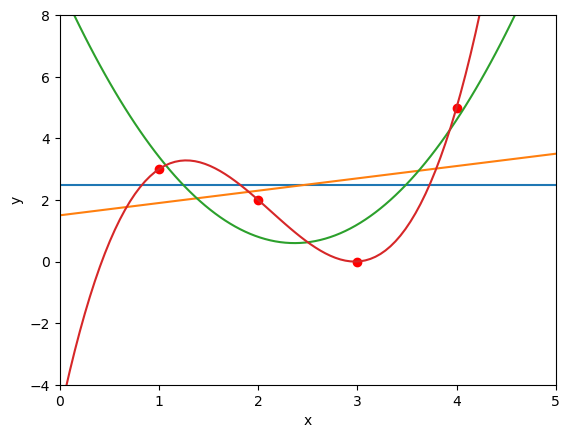

In [213]:
input_x = [1, 2, 3, 4]
Xs = build_basis_up_to_k_4(input_x)
weights = compute_weights_of_lin_reg_by_least_squares(Xs)
y_preds = predict_with_polynomial_func(weights)
plot(x=input_x, y=[3, 2, 0, 5], y_preds=y_preds)